In [10]:
import sys
import lightgbm as lgb
sys.path.append('../')
from data import create_training_data, create_evaluation_data2
from pipeline import run_model_training, run_hyperparameter_tuning, run_model_training_quick, run_predictions

In [12]:
import importlib

AttributeError: module 'sys' has no attribute 'data'

In [11]:
df = create_training_data("2020-21")
eval_df = create_evaluation_data2(session="pred")

create training data version 1.0 stable
test data version 0.1 stable


KeyboardInterrupt: 

In [9]:
eval_df

,name,team,ict_index,bps,minutes,now_cost,event_points,fdr,avg_minutes,ict_index_change,bps_change
3,Leno,1,0.0,0,0,49,0,2,67.50,-4.3,-20.0
7,Rúnarsson,1,0.0,0,0,40,0,2,0.00,0.0,0.0
11,Willian,1,0.0,0,0,63,0,2,0.00,0.0,0.0
15,Aubameyang,1,16.1,30,90,99,9,2,44.25,16.0,30.0
19,Cédric,1,2.5,5,8,44,1,2,47.00,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
2282,Cutrone,20,0.0,0,0,50,0,2,0.00,0.0,0.0
2286,Cundle,20,0.0,0,0,45,0,2,0.00,0.0,0.0
2290,Campbell,20,0.0,0,0,45,0,2,0.00,0.0,0.0
2294,Marques,20,0.0,0,0,40,0,2,0.00,0.0,0.0


In [ ]:
best_hyperparams = run_hyperparameter_tuning(df)

In [3]:
import pickle
params = pickle.load(open("parameters_2021_12_09_14_57.pkl",'rb'))

In [4]:
params

{'n_estimators': 10000,
 'learning_rate': 0.03273211506695059,
 'num_leaves': 2320,
 'max_depth': 7,
 'min_data_in_leaf': 200,
 'max_bin': 297,
 'lambda_l1': 15,
 'lambda_l2': 80,
 'min_gain_to_split': 3.3761412871059924,
 'bagging_fraction': 0.4,
 'bagging_freq': 1,
 'feature_fraction': 0.6000000000000001}

In [4]:
model = run_model_training(params, df)

C:\Users\magnu\AppData\Local\Programs\Python\Python37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 21916, number of used features: 5
[LightGBM] [Info] Start training from score 1.292480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's l2: 5.75836	valid_1's l2: 6.20735
Training until validation scores don't improve for 20000 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's l2: 5.48865	valid_1's l2: 5.93441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's l2: 5.31101	valid_1's l2: 5.74756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's l2: 5.06855	valid_1's l2: 5.50177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	training's l2: 4.9

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

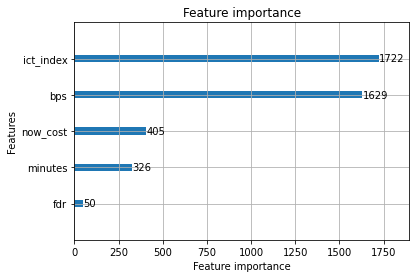

In [5]:
lgb.plot_importance(model[0])

In [5]:
preds = run_predictions(eval_df, "model_2021_12_09_15_24.pkl")

In [6]:
preds.head(n = 30)

,name,ict_index,bps,minutes,now_cost,fdr,predicted_points
1350,Jesus,16.2,53,60,85,2,12.267774
1396,Pogba,15.0,46,74,75,4,12.121969
1216,Salah,17.7,49,90,125,2,12.095725
973,Vardy,10.7,41,90,105,3,12.084389
2044,Dennis,18.3,44,65,50,2,12.074766
713,Lukaku,11.5,58,90,115,4,12.018519
711,Lukaku,20.7,33,90,115,4,12.018519
1416,Fernandes,20.1,61,90,120,4,12.018519
1487,Ronaldo,17.8,57,90,125,4,12.018519
1366,Torres,16.8,51,90,70,2,11.936452
